In [1]:
!pwd
!ls

/Users/sneha/Developer/F1 Project/f1-tyre-strategy-colab
README.md                         src
data                              tyre-degradation-simulation.ipynb
requirements.txt                  venv


In [2]:
import sys
sys.path.append("src")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_loader import load_race_data
from degradation import TyreDegradationModel
from strategy import simulate_strategy

In [4]:
race_data = load_race_data("data/processed/race_data.csv")
race_data.head()

,lap,tyre_life
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [5]:
model = TyreDegradationModel(alpha=0.03)
model.fit(race_data)

In [6]:
import inspect
from degradation import TyreDegradationModel
print(inspect.signature(TyreDegradationModel.predict))

(self, tyre_life)


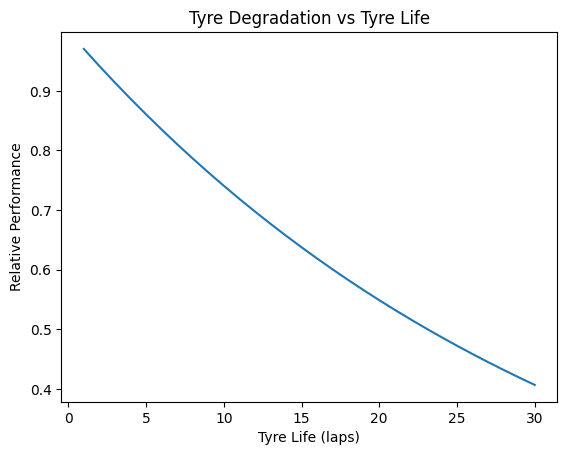

In [7]:
tyre_life = np.arange(1, 31)
curve = model.predict(tyre_life)

plt.figure()
plt.plot(tyre_life, curve)
plt.xlabel("Tyre Life (laps)")
plt.ylabel("Relative Performance")
plt.title("Tyre Degradation vs Tyre Life")
plt.show()

In [8]:
results = simulate_strategy(
    degradation_model=model,
    total_laps=70,
    pit_window=(15, 40)
)

results_df = pd.DataFrame(results, columns=["Pit Lap", "Total Degradation Cost"])
results_df.head()

,Pit Lap,Total Degradation Cost
0,15,38.428496
1,16,38.855230
2,17,39.257826
3,18,39.636649
4,19,39.992038


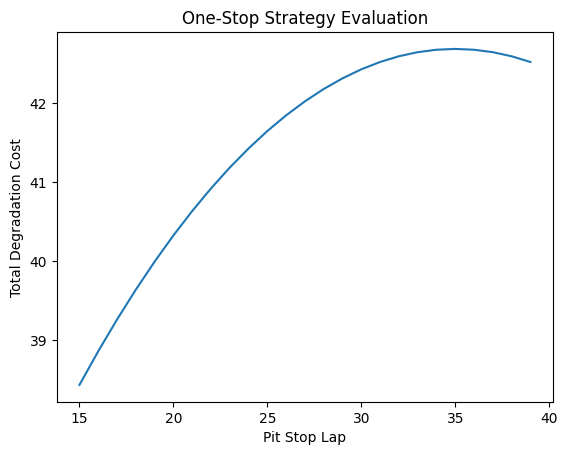

In [9]:
plt.figure()
plt.plot(results_df["Pit Lap"], results_df["Total Degradation Cost"])
plt.xlabel("Pit Stop Lap")
plt.ylabel("Total Degradation Cost")
plt.title("One-Stop Strategy Evaluation")
plt.show()